<a href="https://colab.research.google.com/github/Manvi0509/Manvi0509.github.io/blob/main/GRU_code_AQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
# Load your AQI data
data = pd.read_excel(r"/content/DELHI_AQI.xlsx")
data
# Step 1: Prepare Data
# Ensure Timestamp is set as a DateTimeIndex and create lagged features
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.set_index('Timestamp', inplace=True)
data
# Remove leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Check column names again
print(data.columns)
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the columns for which you want to create lag features
from sklearn.preprocessing import MinMaxScaler
columns = ['Max temp', 'Min temp', 'precip', 'windspeed', 'winddir',
           'PM2.5', 'PM10', 'NO2', 'SO2', 'Max 8-h CO', 'Max 8-h Ozone', 'AQI']

# Check which columns exist in the dataset
existing_columns = [col for col in columns if col in data.columns]

# Generate 1 lag for each available column (including original)
lags = 1
for col in existing_columns:
    # Create lagged feature
    data[f'{col}lag{lags}'] = data[col].shift(lags)

# Drop rows with NaN values (from lagged features)
data = data.dropna()

# Define predictors (both original and lagged features)
predictors =  [f'{col}lag{lags}' for col in existing_columns]

# Print the final list of predictors
print("Final predictors:", predictors)
# Define the training and testing data (80-20 split)
train_size = int(0.8 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

X_train = train_data[predictors]
y_train = train_data['AQI']
X_test = test_data[predictors]
y_test = test_data['AQI']

# Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Index(['AQI', 'Max temp', 'Min temp', 'precip', 'windspeed', 'winddir',
       'PM2.5', 'PM10', 'NO2', 'SO2', 'Max 8-h CO', 'Max 8-h Ozone'],
      dtype='object')
Final predictors: ['Max templag1', 'Min templag1', 'preciplag1', 'windspeedlag1', 'winddirlag1', 'PM2.5lag1', 'PM10lag1', 'NO2lag1', 'SO2lag1', 'Max 8-h COlag1', 'Max 8-h Ozonelag1', 'AQIlag1']


In [4]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Reshape for GRU (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define GRU model
quantile = 0.85
model = Sequential([
    GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)  # Output one value per input sample
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Predict on test data
predictions = model.predict(X_test).flatten()

# Compare actual vs predicted values
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})
print(comparison.head(50))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 43462.4297 - val_loss: 9872.6348
Epoch 2/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7762.6982 - val_loss: 2332.0181
Epoch 3/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2033.7382 - val_loss: 1539.1346
Epoch 4/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1634.4006 - val_loss: 1536.5991
Epoch 5/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1515.8790 - val_loss: 1450.5762
Epoch 6/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1602.1437 - val_loss: 1610.4022
Epoch 7/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1619.4806 - val_loss: 1431.0328
Epoch 8/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1407.3434 - val_loss: 1428.7528
Epoch 9/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1511.1167 - val_loss: 1425.6401
Epoch 10/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1456.9146 - val_loss: 1523.6184
Epoch 11/80
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1501.7643 - val_loss: 1472.5927
Epoch 

Mean Absolute Error (MAE): 27.497360229492188
Mean Squared Error (MSE): 1425.6402587890625
R-squared: 0.8783822655677795


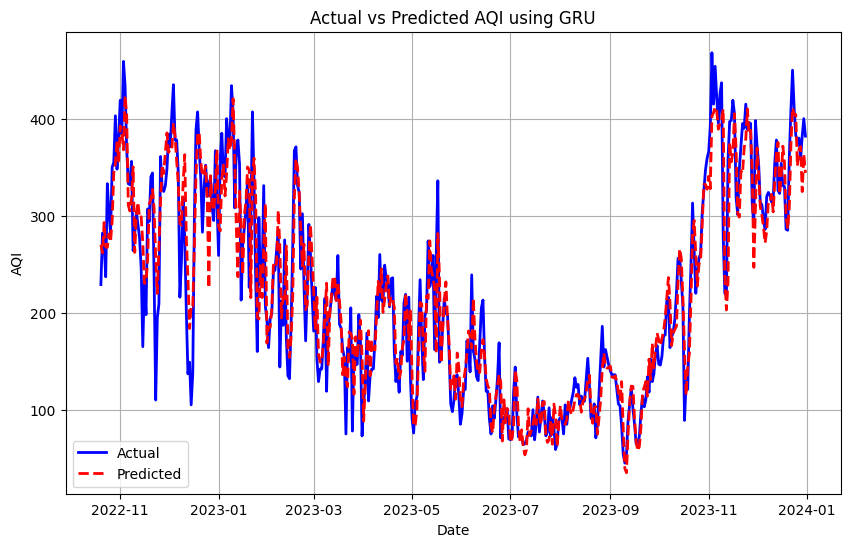

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate error metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue', linestyle='-', linewidth=2)
plt.plot(y_test.index, predictions, label='Predicted', color='red', linestyle='--', linewidth=2)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actual vs Predicted AQI using GRU')
plt.legend()
plt.grid(True)
plt.show()
